In [1]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import statsmodels.api as sm    #to generate all Statistical models (linear regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset

advertising = pd.read_csv("advertising.csv")

In [3]:
#Observe the data set: X1 = TV , X2 = Radio , X3 = Newspaper , Y = Sales (Target Variable)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#Peeking the Data

advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()   # only works on the numerical features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


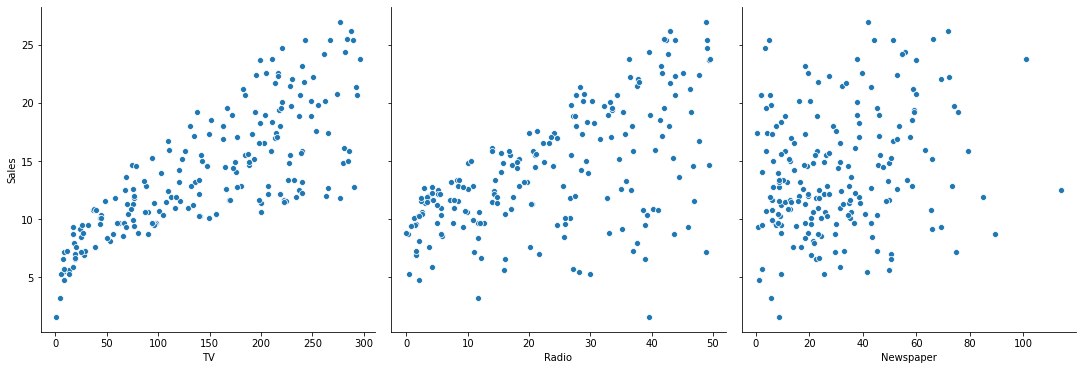

In [7]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

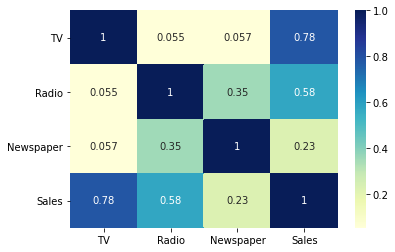

In [8]:
#Analyzing correlation with help of heatmap

sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot =True)
plt.show()

In [9]:
## defining the independent and dependent variables in the dataset.
#Presently working only with one independent variable 'TV'

#When the model is based on one independent variable it results in Simple Linear regression Model

X = advertising['TV']
y = advertising['Sales']

In [10]:
# Analyzing multcollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = advertising[['TV','Newspaper','Radio']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_data)

     feature       VIF
0         TV  2.486772
1  Newspaper  3.055245
2      Radio  3.285462


In [11]:
#Splitting the data into Train and Test (with split ratio = 70-30)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [12]:
X_train =  X_train.values.reshape(-1,1)     #you want to convert the data in single column
X_test = X_test.values.reshape(-1,1)

#Y is by default a single column only! 
#X being the indpendent variable can have more than one column,so in order to convert it to a single column array
# we reshape it

In [13]:
# Instantiating the LinearRegression() model

lm = LinearRegression()    #instatiation

In [14]:
#Fitting the model and getting the parameter values:

lm.fit(X_train, y_train)
print(lm.intercept_)   #constant
print(lm.coef_)    #slope  #regression coefficient. # m

#lm.get_params


6.745302251222065
[0.05024351]


In [15]:
#Finding the predicted values of Y
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [16]:
#Calculating the metric for training and testing dataset
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.6411433688483876
0.5111616978794153


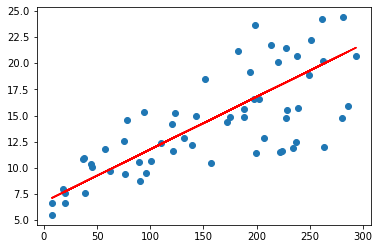

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lm.predict(X_test), 'r')
plt.show()

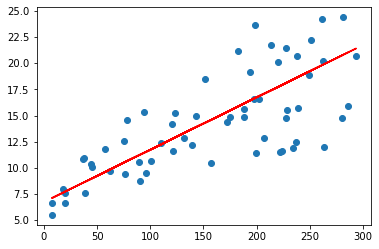

In [18]:
#y_pred = m*X_test + c
#y_pred = 0.6411*X_test + 0.51116

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.74 + 0.050 * X_test, 'r')
plt.show()

In [19]:
# Multiple Linear Regression model (with more than 1 independent variables)

feature_cols = ['TV', 'Radio', 'Newspaper']
X_all = advertising[feature_cols]    #advertising[['TV','Radio','Newspaper']]
y = advertising.Sales                #it can be written as advertising['Sales']

# Train_test_split the new data
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, train_size = 0.7, test_size = 0.3, random_state = 5)

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_all_train, y_train)

# Prediction of target variable
y_train_pred = lm2.predict(X_all_train)
y_test_pred = lm2.predict(X_all_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8997682984995
0.8868821951328664


In [20]:
#Assignment

#1.TV & radio , TV and Newspaper , Radio and newspaper 

#2. To calculate the Evaluation Metrices at one place (R2, Adj R2, RMSE)

#sklearn.metrics.mean_squared_error (use this method to calculate RMSE)

In [21]:
#1.TV & radio 
# Multiple Linear Regression model (with more than 1 independent variables)

feature_cols = ['TV', 'Radio']
X_all = advertising[feature_cols]    #advertising[['TV','Radio']]
y = advertising.Sales                #it can be written as advertising['Sales']

# Train_test_split the new data
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, train_size = 0.7, test_size = 0.3, random_state = 6)

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_all_train, y_train)


# Prediction of target variable
y_train_pred = lm2.predict(X_all_train)
y_test_pred = lm2.predict(X_all_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


0.9070849753890726
0.8617537193073043


In [22]:
#2)TV and Newspaper 

x=advertising[['TV','Newspaper']]
y=advertising["Sales"]
# Train_test_split the new data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)
# instantiate and fit
lm=LinearRegression()
lm.fit(x_train,y_train)

# Prediction of target variable
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))




0.6674296046949286
0.567294377838726


In [23]:
#3 Radio and newspaper 
x=advertising[["Radio","Newspaper"]]
y=advertising["Sales"]

#Train_test_split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=77)
# instantiate and fit
lm=LinearRegression()
lm.fit(x_train,y_train)


#Predicting TV
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

#adjusted r2


0.29830415363291984
0.4068726083128159
